how do you know that it is int16

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [13]:
#noice reduction: take eroation,then dilation
#fill the holes: dillation followed by erosion
#gradient: different between dilation and eroation # pxel?
#tophat(noice opject): difference between input
#black hat find the location of the hole in the image.

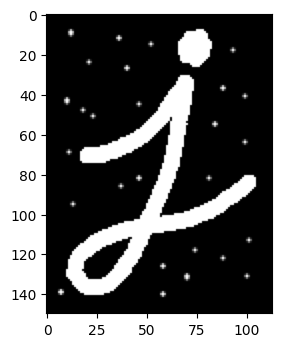

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
url = '../dataset/opening.png'
img = cv2.imread(url)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')

In [ ]:
ker = np.ones((3,3),np.uint8)
res = cv2.morphologyEx(gray)

# Asignment

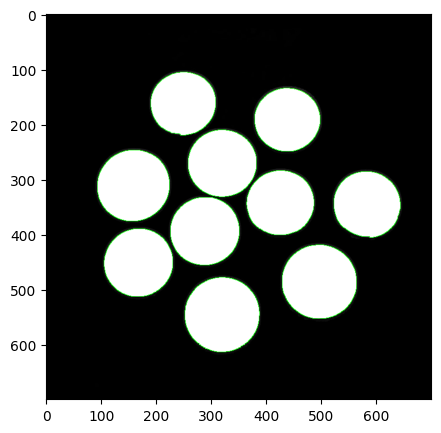

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('../dataset/coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


_, thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)

# morphological closing and opening
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=2)

#mask
coin_mask = opening.copy()

# Find the border by subtracting the eroded image from the dilated image, border: 3 pixels
border = cv2.dilate(opening, kernel, iterations=1) - cv2.erode(opening, kernel, iterations=1)

# green color border
green_border = np.zeros_like(img)
green_border[border == 255] = [0, 255, 0]

# Change the color of the coins to white 
img[coin_mask == 255] = [255, 255, 255]

# Overlay the green border on the image
result = cv2.addWeighted(img, 1, green_border, 1, 0)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(5, 5))
plt.imshow(result_rgb)
plt.show()


hough circle

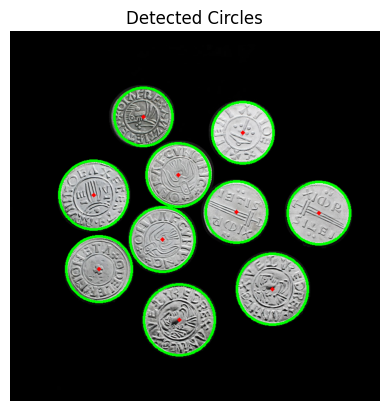

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ensure that matplotlib displays images inline in the Jupyter notebook
%matplotlib inline

# Step 1: Read the image
image = cv2.imread('../dataset/coins.jpg')
output = image.copy()

# Step 2: Preprocess the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

# Step 3: Apply Hough Circle Transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=50,
                           param1=200, param2=30, minRadius=40, maxRadius=100)

# Step 4: Draw Circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])  # circle center
        radius = i[2]  # circle radius
        # Draw the circle in the output image
        cv2.circle(output, center, radius, (0, 255, 0), 3)
        # Draw the center of the circle
        cv2.circle(output, center, 2, (0, 0, 255), 3)

# Convert BGR to RGB for displaying correctly in matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.imshow(output_rgb)
plt.title('Detected Circles')
plt.axis('off')  # Hide the axis
plt.show()


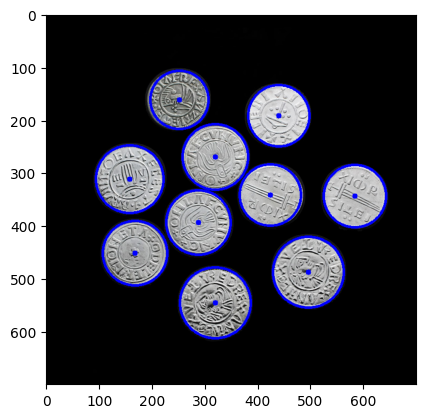

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('../dataset/coins.jpg')  
output = image.copy()


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=50,
                           param1=370, param2=45, minRadius=40, maxRadius=100)

# Draw blue lines
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])  
        radius = i[2]  
        cv2.circle(output, center, radius, (255, 0, 0), 3)  # Blue line for the circle (3px)
        cv2.circle(output, center, 5, (255, 0, 0), -1)  # Blue dot for the center (5px)


output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output_rgb)
plt.show()
